# Loan Data from Prosper - Exploration
## by Borbala Darabos

## Preliminary Wrangling

[Loan Data from Prosper](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000) data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

[Prosper Data Dictionary to Explain Dataset's Variables](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=False, dtype='unicode')

In [6]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
print(loan.head(10))

(113937, 81)
ListingKey                     object
ListingNumber                  object
ListingCreationDate            object
CreditGrade                    object
Term                           object
                                ...  
PercentFunded                  object
Recommendations                object
InvestmentFromFriendsCount     object
InvestmentFromFriendsAmount    object
Investors                      object
Length: 81, dtype: object
                ListingKey ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B        193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1       1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A         81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A        658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2        909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D       1074836  2013-12-14 08:26:37.093000000   
6  0F0A35767542550

In [5]:
# descriptive statistics for numeric variables
print(loan.describe())

                     ListingKey ListingNumber            ListingCreationDate  \
count                    113937        113937                         113937   
unique                   113066        113066                         113064   
top     17A93590655669644DB4C06        951186  2013-10-02 17:20:16.550000000   
freq                          6             6                              6   

       CreditGrade    Term LoanStatus           ClosedDate BorrowerAPR  \
count        28953  113937     113937                55089      113912   
unique           8       3         12                 2802        6677   
top              C      36    Current  2014-03-04 00:00:00     .357970   
freq          5649   87778      56576                  105        3672   

       BorrowerRate LenderYield  ... LP_ServiceFees LP_CollectionFees  \
count        113937      113937  ...         113937            113937   
unique         2294        2283  ...          19813              6175   
top      

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. Most variables are numeric in nature, but the variable 'ProsperRating (Alpha)' is ordered factor variables with the following level.

(worst) ——> (best) <br>
'N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'<br>

### What is/are the main feature(s) of interest in your dataset?

There are various analyses possible with such large amount of data. I am thinking about investigating the loans (loan amount, APR, current status, listing category, monthly loan payment). I can get background information about the borrower (borrower's state, occupation, employment status, employment status duration, whether the borrower was a homeowner, debt to income ration, income range). I can also take a look at the risk calculation (CreditGrade, prosper rating, prosper score).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I want to get a overall picture of the loans, to see how the borrower's background affected the loan they were eligible for, and to check if the risk analysis properly predicted the outcome of the loan.

## Data Wrangling

I cleand the null values and altered datatypes if needed.

In [7]:
#copy dataset
loan_copy = loan.copy()

In [8]:
# check columns because ListingCategory was not available
loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [9]:
# check null values for 'ProsperRating (Alpha)' column
loan['ProsperRating (Alpha)'].isnull().sum()

29084

In [10]:
# check null values for 'ProsperRating (numeric)' column
loan_copy['ProsperRating (numeric)'].isnull().sum()

29084

In [11]:
# drop 'ProsperRating (numeric)' line with null values
loan_copy['ProsperRating (numeric)'].dropna(inplace=True)

In [12]:
# check null values for 'EstimatedEffectiveYield' column
loan_copy['EstimatedEffectiveYield'].isnull().sum()

29084

In [13]:
# drop 'EstimatedEffectiveYield' line with null values
loan_copy['EstimatedEffectiveYield'].dropna(inplace=True)

In [14]:
# change data type of 'LoanOriginalAmount' to int
loan_copy.LoanOriginalAmount = loan_copy.LoanOriginalAmount.astype(int)

In [15]:
# change data type of 'BorrowerAPR' to float
loan_copy.BorrowerAPR = loan_copy.BorrowerAPR.astype(float)

In [16]:
# change data type of 'EstimatedEffectiveYield' to float
loan_copy.EstimatedEffectiveYield = loan_copy.EstimatedEffectiveYield.astype(float)

In [17]:
# add new columns of ListingCategory as categories instead of numbers
loan_copy['ListingCategory'] = loan_copy['ListingCategory (numeric)']

In [18]:
# spell out categories of ListingCategory
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('1', 'Debt Consolidation')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('2', 'Home Improvement')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('3', 'Business')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('4', 'Personal Loan')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('5', 'Student Use')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('6', 'Auto')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('7', 'Other')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('8', 'Baby&Adoption')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('9', 'Boat')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('10', 'Cosmetic Procedure')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('11', 'Engagement Ring')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('12', 'Green Loans')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('13', 'Household Expenses')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('14', 'Large Purchases')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('15', 'Medical/Dental')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('16', 'Motorcycle')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('17', 'RV')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('18', 'Taxes')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('19', 'Vacation')
loan_copy['ListingCategory'] = loan_copy['ListingCategory'].replace('20', 'Wedding Loans')

In [19]:
# drop '0 - Not Available' values from the column
loan_copy = loan_copy[loan_copy['ListingCategory'] != '0']

In [20]:
loan_copy['IncomeRange'].value_counts()

$50,000-74,999    28757
$25,000-49,999    28651
$100,000+         16430
$75,000-99,999    15892
$1-24,999          6070
Not employed        734
$0                  438
Name: IncomeRange, dtype: int64

In [21]:
# copy $0 value instead of Not employed
loan_copy['IncomeRange'] = loan_copy['IncomeRange'].replace('Not employed', '$0')

In [22]:
# change data type of 'BorrowerRate' to float
loan_copy.BorrowerRate = loan_copy.BorrowerRate.astype(float)

In [23]:
loan_copy['ProsperScore'].isnull().sum()

12139

In [24]:
# drop 'ProsperScore' line with null values
loan_copy['ProsperScore'].dropna(inplace=True)

In [25]:
# delete '.000000' floats from ProsperScore values
loan_copy.ProsperScore = loan_copy.ProsperScore.str.rstrip('.000000')

In [26]:
# change data type of 'MonthlyLoanPayment' to float
loan_copy.MonthlyLoanPayment = loan_copy.MonthlyLoanPayment.astype(float)

In [27]:
# drop '0.00' values from the column
loan_copy = loan_copy[loan_copy['MonthlyLoanPayment'] != 0.00]

In [28]:
# create clean csv file for the explanatory investigation
loan_copy.to_csv (r'C:\Users\Borcsi\Downloads\loan_copy.csv', index = False, header=True)

In [29]:
# convert ProsperRating and IncomeRange into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_copy[var] = loan_copy[var].astype(ordered_var)

In [30]:
# convert LoanStatus and ListingCategory into categorical types
var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'PastDue'],
            'ListingCategory': ['Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']}

for var in var_dict:
    cat_var = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = var_dict[var])
    loan_copy[var] = loan_copy[var].astype(cat_var)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

What is the general distribution of the loan amounts?

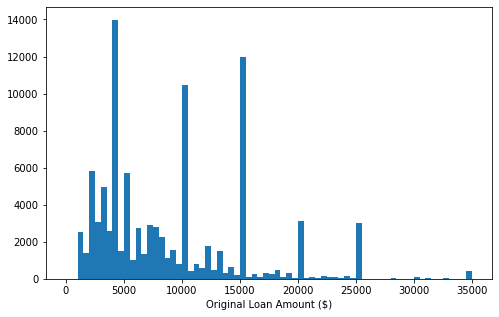

In [15]:
# start with a standard-scaled plot of Original loan amounts
binsize = 500
bins = np.arange(0, loan_copy['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_copy, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Original Loan Amount ($)')
plt.show()

What is the distribution of loans up to 5000 USD?

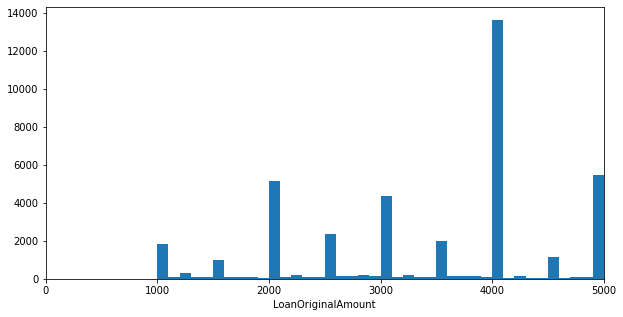

In [32]:
# investigating further on an even smaller bin size
binsize = 100
bins = np.arange(500, 5001, 100)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_copy, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([0,5000])
plt.xlabel('LoanOriginalAmount')
plt.show()

Will the logarithmic transformation provide information about this multimodal data of loan amount?

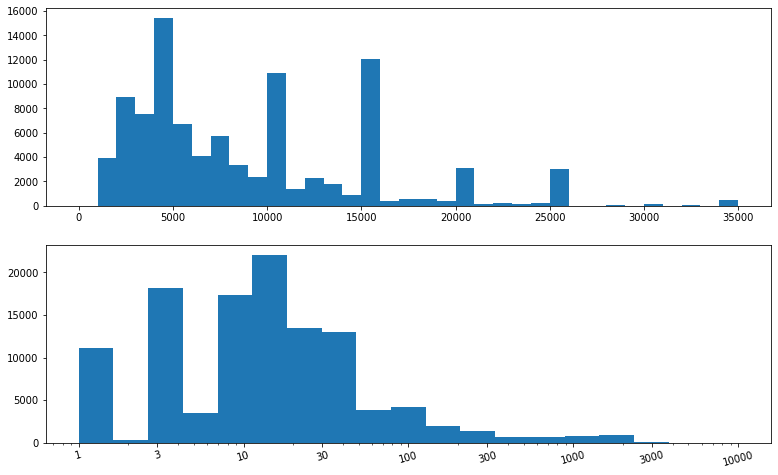

In [16]:
# univariate plot of original loan amounts
fig, axes = plt.subplots(nrows=2,figsize=(13,8))
# - - - -
bin_width = 1000
bins = np.arange(0, loan_copy.LoanOriginalAmount.max()+bin_width, bin_width)
ax = axes[0]
ax.hist(data = loan_copy, x = 'LoanOriginalAmount', bins = bins);
# - - - -
ax = axes[1]
bin_width = 100
bins = np.logspace(0, np.log10(10000), 20)
ax.hist(data = loan_copy, x = 'LoanOriginalAmount', bins = bins);
ax.set_xscale('log');
x_ticks = [500, 1000, 3000, 10000, 15000, 20000, 25000, 30000, 35000]
ax.set(xticks = x_ticks, xticklabels = x_ticks);
for tick in ax.get_xticklabels():
    tick.set_rotation(15)

The logarithmic transformation does not provide more information so it can be eliminated in the explanatory analysis.

What is the distribution of Prosper Rating and Loan Status? Can I get to know more about the outcome of the loans with these?

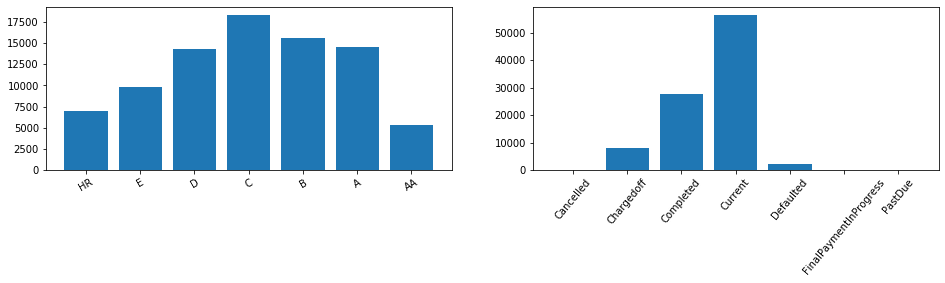

In [101]:
# univariate plots of ProsperRating and LoanStatus
fig, axes = plt.subplots(ncols=2,figsize=(16,3))

def summary_bar_chart ( ax, data, field, labels, rotation = 0 ) :
    summary = pd.DataFrame(data[field].value_counts())
    bar_width=0.5 ; bins = np.arange(len(labels)+1) - bar_width/2
    summary['value'] = summary[field]
    summary[field] = summary.index
    summary[field] = pd.Categorical(summary[field], categories=labels, ordered=True)
    ax.bar(field, 'value', data=summary.sort_values(field));
    if rotation > 0 :
        for tick in ax.get_xticklabels():
            tick.set_rotation(rotation)

labels = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
summary_bar_chart(axes[0], loan_copy, 'ProsperRating (Alpha)', labels, rotation=30)

labels = ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'PastDue']
summary_bar_chart(axes[1], loan_copy, 'LoanStatus', labels, rotation=50)

Prosper Rating shows a general distribution but the Loan Status is not mostly completed or current which will not explain the differences between the Prosper Rating.

What is the distribution of Listing Category and Income Range?

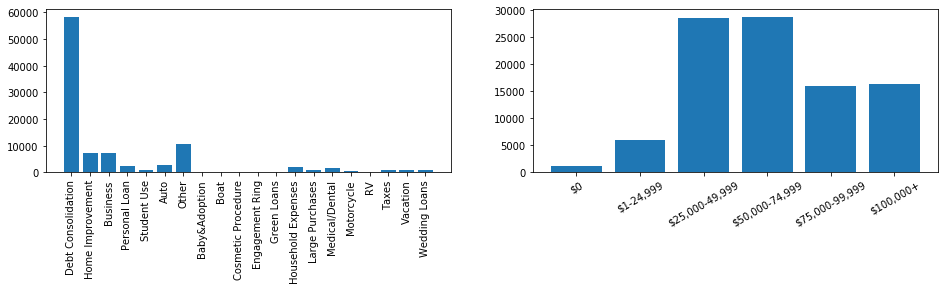

In [103]:
# univariate plots of ListingCategory and IncomeRange
# fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=4,figsize=(20,3))
fig, axes = plt.subplots(ncols=2,figsize=(16,3))

def summary_bar_chart ( ax, data, field, labels, rotation = 0 ) :
    summary = pd.DataFrame(data[field].value_counts())
    bar_width=0.5 ; bins = np.arange(len(labels)+1) - bar_width/2
    summary['value'] = summary[field]
    summary[field] = summary.index
    summary[field] = pd.Categorical(summary[field], categories=labels, ordered=True)
    ax.bar(field, 'value', data=summary.sort_values(field));
    if rotation > 0 :
        for tick in ax.get_xticklabels():
            tick.set_rotation(rotation)

labels = ['Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
summary_bar_chart(axes[0], loan_copy, 'ListingCategory', labels, rotation=90)

labels = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
summary_bar_chart(axes[1], loan_copy, 'IncomeRange', labels, rotation=30)

Debt Consolidation stands out in Listing Category. The income range is right skewed,

What is the distribution of Prosper Rating?

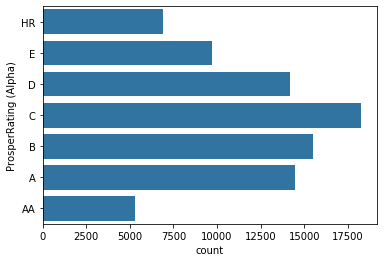

In [87]:
# let's plot the ordinal variable's distribution
figsize = [8,10]

default_color = sb.color_palette()[0]
sb.countplot(data = loan_copy, y = 'ProsperRating (Alpha)', color = default_color)
plt.show()

What is the distribution of Loan Status and Listing Category sorted from max to min?

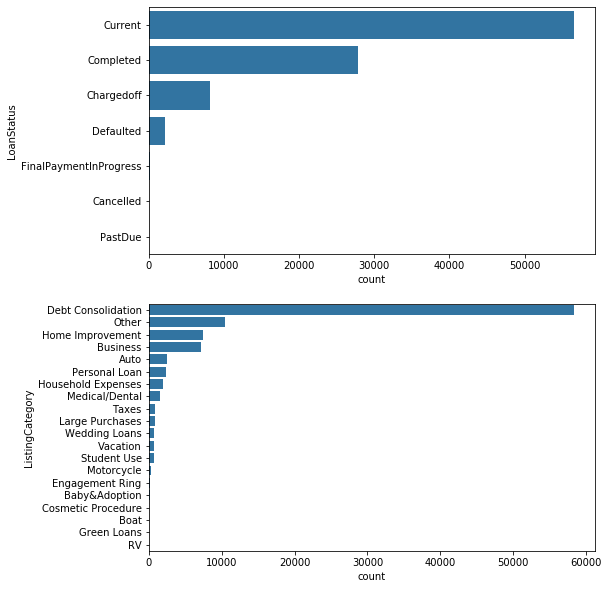

In [19]:
# let's plot the categorical variables which are not ordinal to get an idea of each variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [8,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_copy, y = 'LoanStatus', color = default_color, order = loan_copy['LoanStatus'].value_counts().index, ax = ax[0])
sb.countplot(data = loan_copy, y = 'ListingCategory', color = default_color, order = loan_copy['ListingCategory'].value_counts().index, ax = ax[1])

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

First, I checked the distribution of the loan amount in a histogram. It is right-skewe so there are more loans with smaller amount under 5k, but there are definite peaks at the 5000, 10000, 15000, 25000, 30000. The log transformation did not have added value to the dataset.

I investigated categorical variables. First, the ordinal categorical variable of Prosper rate which exhibits general distribution with a peak in the center. The other categorical variables are not ordered but give information about loan status (most are active) and the category of the loan (most are for debt consodilation, home improvement, business, and auto).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did some data wrangling by eliminating null or NA values to get more clear visualizations. I tried logarithmic transformation on the loan amount due to the outliers at the round numbers but it did not provide further explanation. IIt was better to turn vertically the visualization of the categorical variables.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

What is the relation between the loan amount and the income range?

C:\Users\Borcsi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


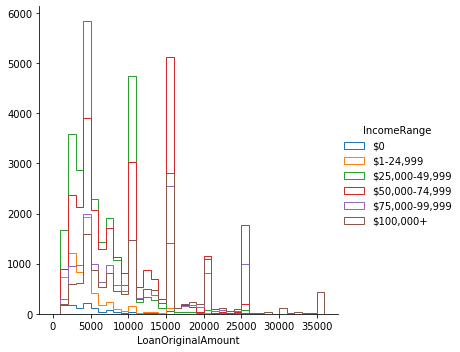

In [110]:
# Loan amount vs. IncomeRange
bin_width = 1000 ; bin_edges = np.arange(-3, loan_copy['LoanOriginalAmount'].max()+bin_width, bin_width)
g = sb.FacetGrid(data = loan_copy, hue = 'IncomeRange', size = 5)
g.map(plt.hist, "LoanOriginalAmount", bins = bin_edges, histtype = 'step') 
# g.set(yticks = ticks, yticklabels = ticks)
g.add_legend();

How do Estimated Effective Yield, Loan Original Amount, and BorrowerAPR affect each other?  

In [34]:
# add numeric variables and categorical variables
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'EstimatedEffectiveYield']
categoric_vars = ['ListingCategory', 'BorrowerState', 'Occupation', 'IncomeRange']

C:\Users\Borcsi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Borcsi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


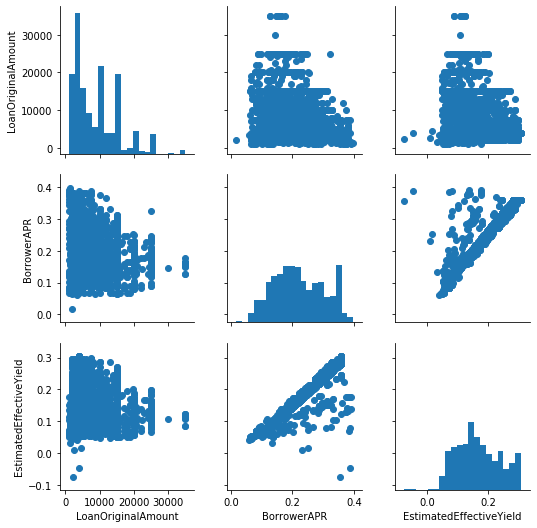

In [112]:
# plot matrix: sample 2000 loans so that plots are clearer and
# they render faster
samples = np.random.choice(loan_copy.shape[0], 2000, replace = False)
loan_copy_samp = loan_copy.loc[samples,:]

g = sb.PairGrid(data = loan_copy_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

How do categorical variables (Listing Category, Borrower State and Occupation) affect numeric variables (loan amount, borrowerAPR, Estimated effective yield)?

<Figure size 1080x1080 with 0 Axes>

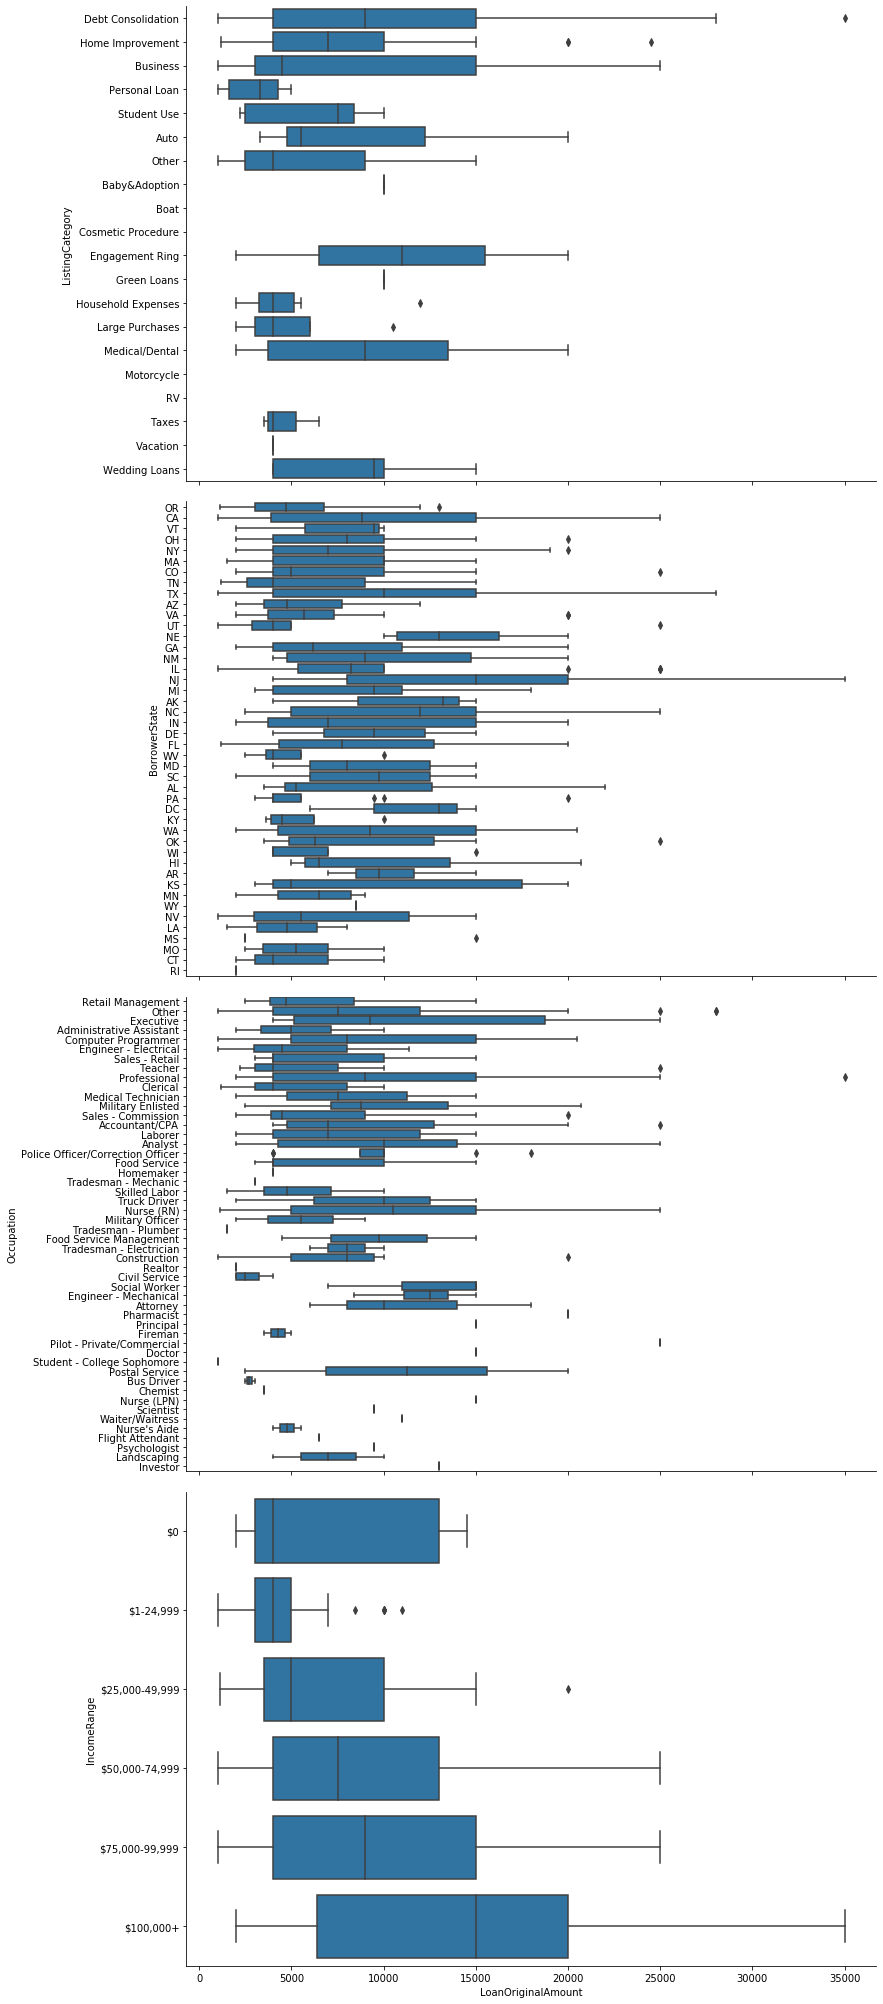

In [113]:
# plot matrix of LoanOriginalAmount vs. categorical features.

samples = np.random.choice(loan_copy.shape[0], 500, replace = False)
loan_copy_samp = loan_copy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_copy_samp, x_vars = ['LoanOriginalAmount'], y_vars = categoric_vars,
                size = 7, aspect = 1.5)
g.map(boxgrid)
plt.show();

C:\Users\Borcsi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\Borcsi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

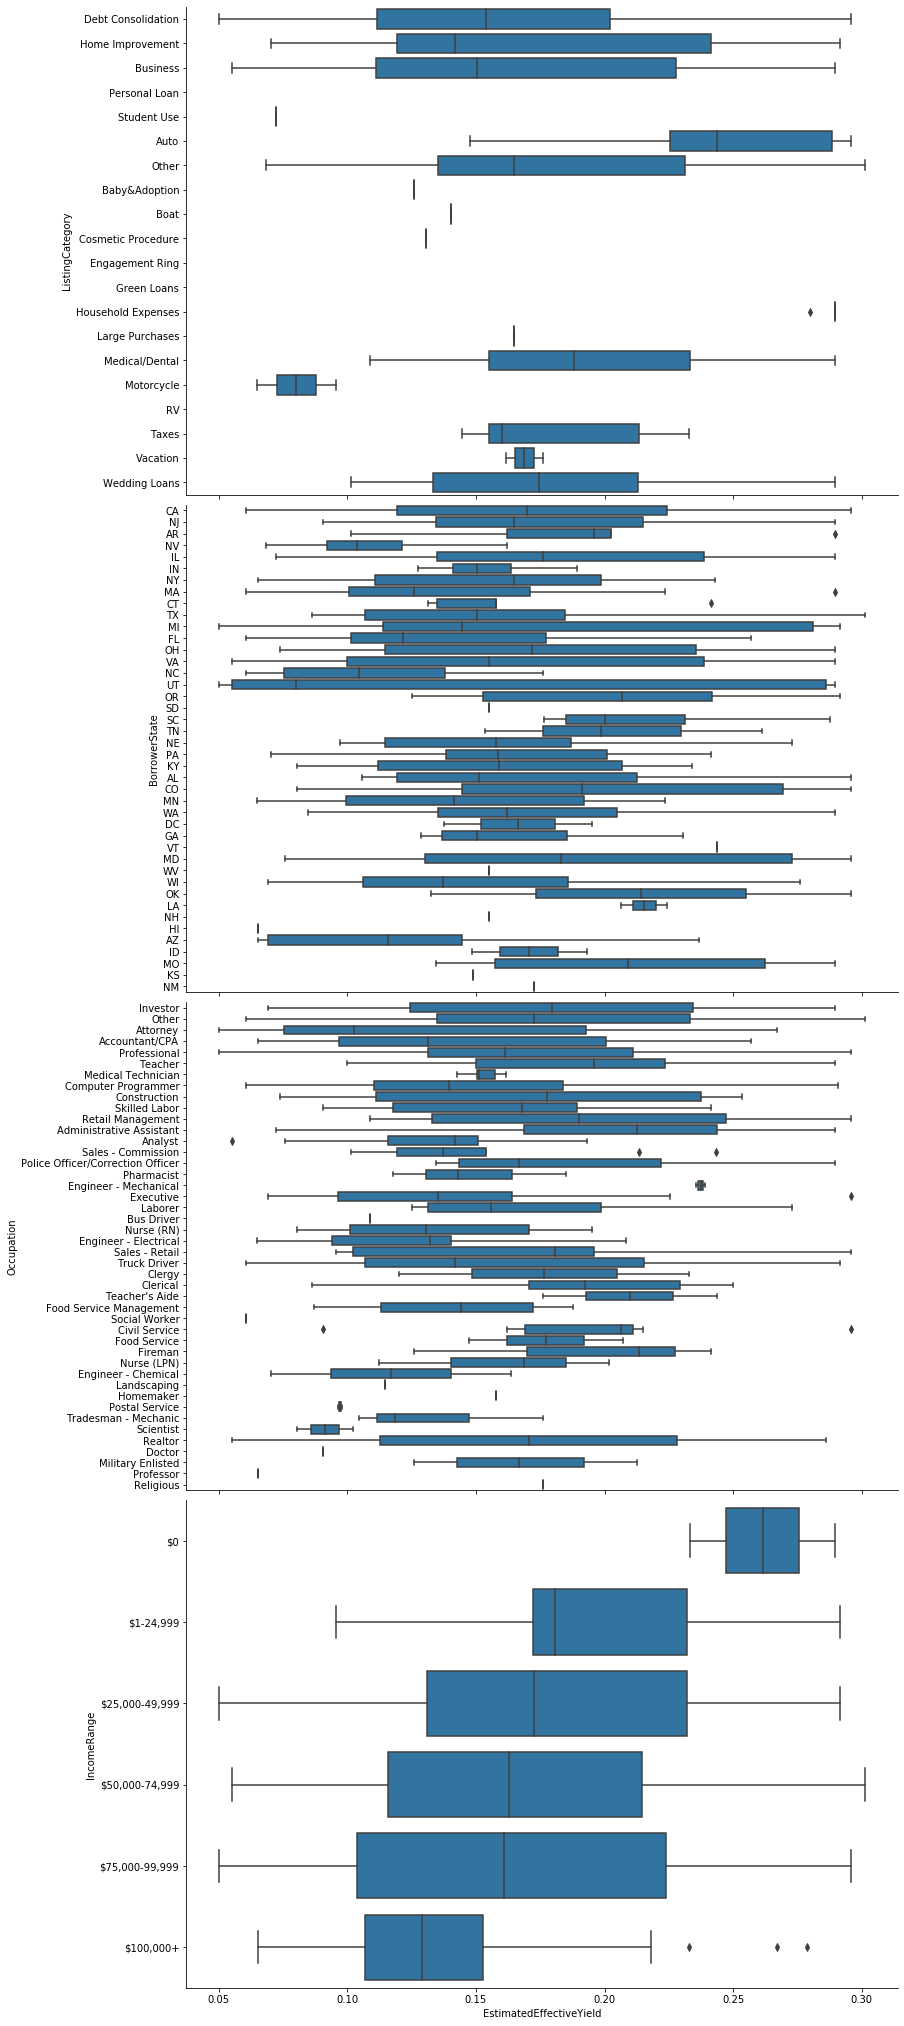

In [36]:
# plot matrix of numeric features against categorical features.
samples = np.random.choice(loan_copy.shape[0], 500, replace = False)
loan_copy_samp = loan_copy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_copy_samp, x_vars = ['EstimatedEffectiveYield'], y_vars = categoric_vars,
                size = 7, aspect = 1.5)
g.map(boxgrid)
plt.show();

C:\Users\Borcsi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

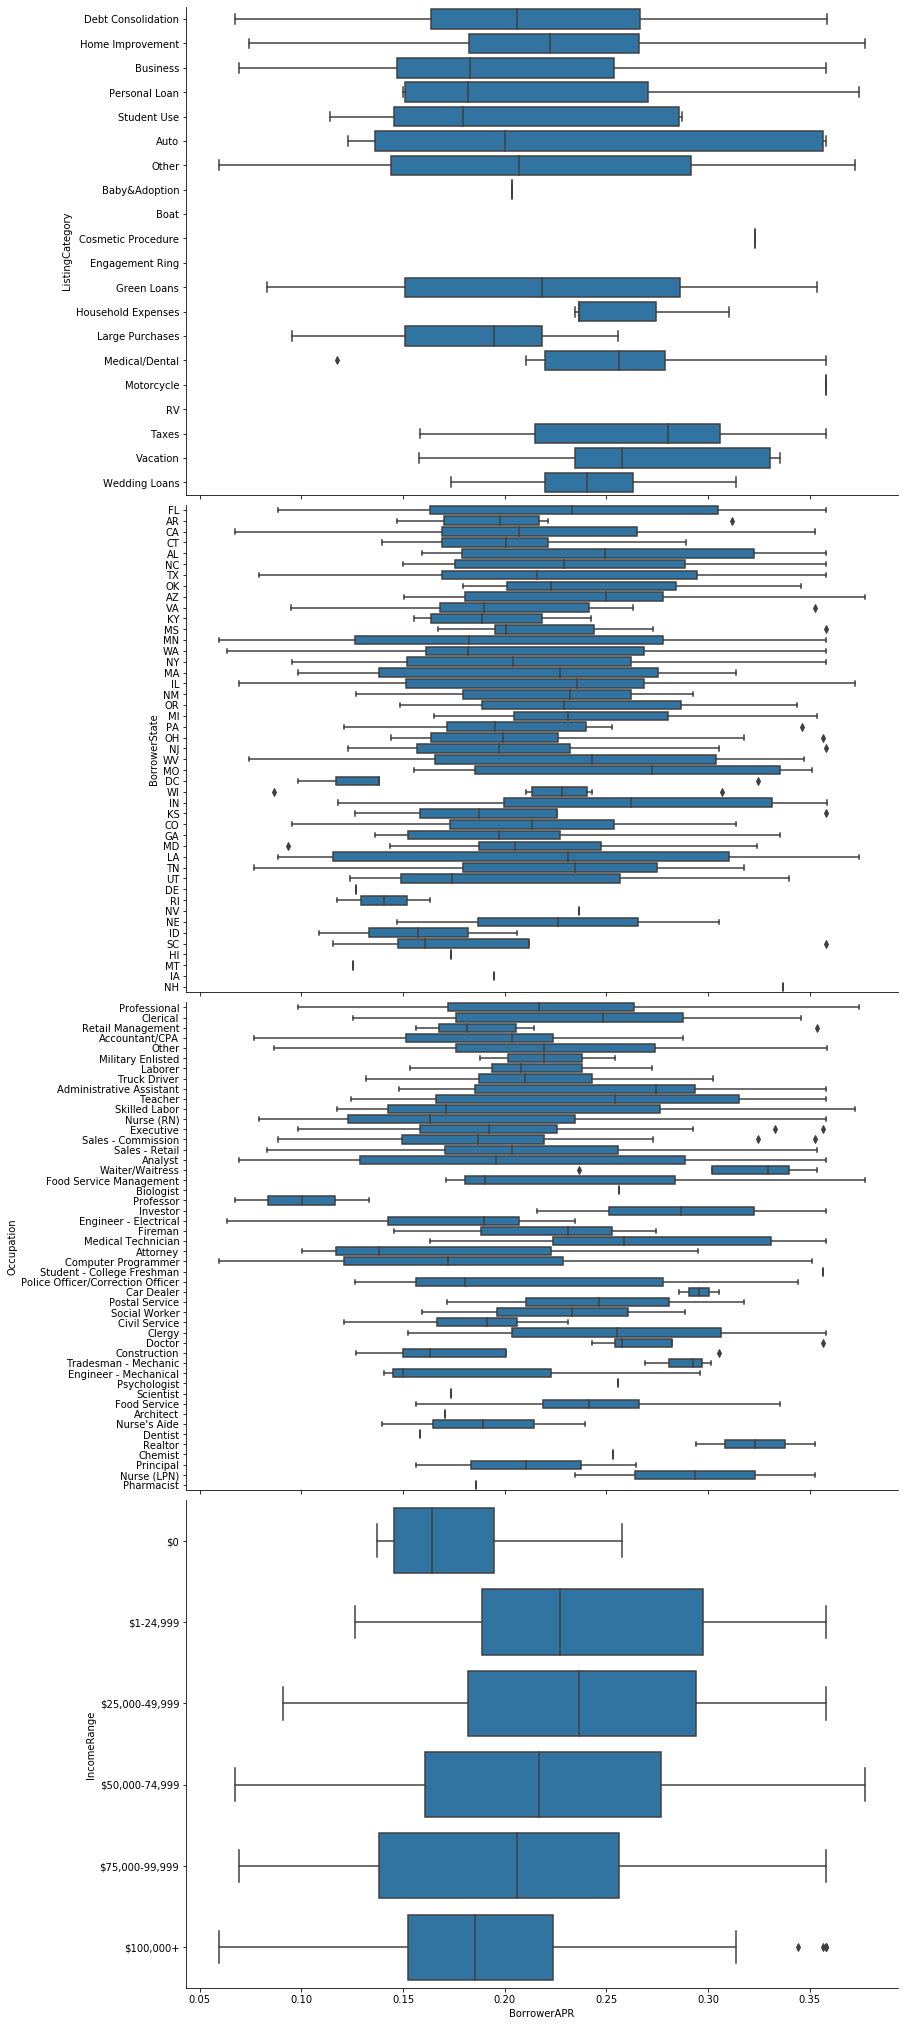

In [35]:
# plot matrix of BorroweAPR against categorical features.
samples = np.random.choice(loan_copy.shape[0], 500, replace = False)
loan_copy_samp = loan_copy.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = loan_copy_samp, x_vars = ['BorrowerAPR'], y_vars = categoric_vars,
                size = 7, aspect = 1.5)
g.map(boxgrid)
plt.show();

Does income range affect loan status?

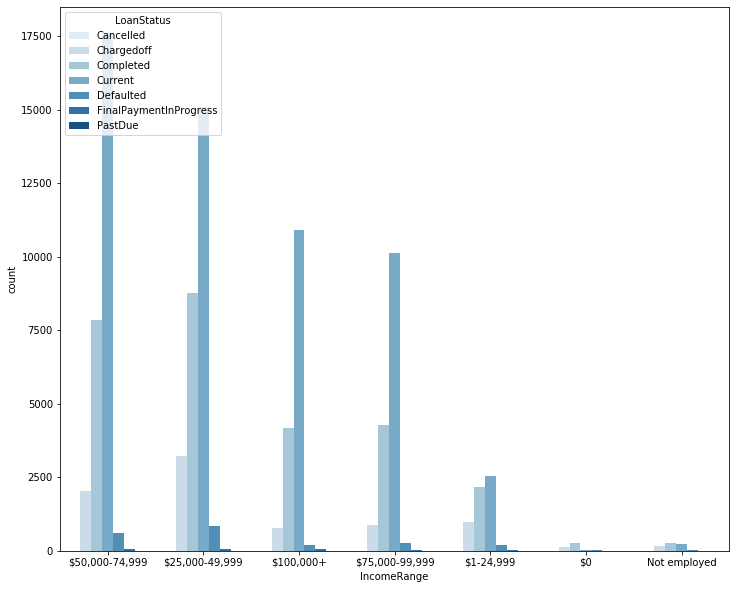

In [87]:
# Incomerange vs. LoanStatus
plt.figure(figsize = [12, 10])
sb.countplot(data = loan_copy, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Blues')
plt.show()

Since most of the loan status are completed or current, there is no palpable relation with income range.

What is the relation between income range and loan category

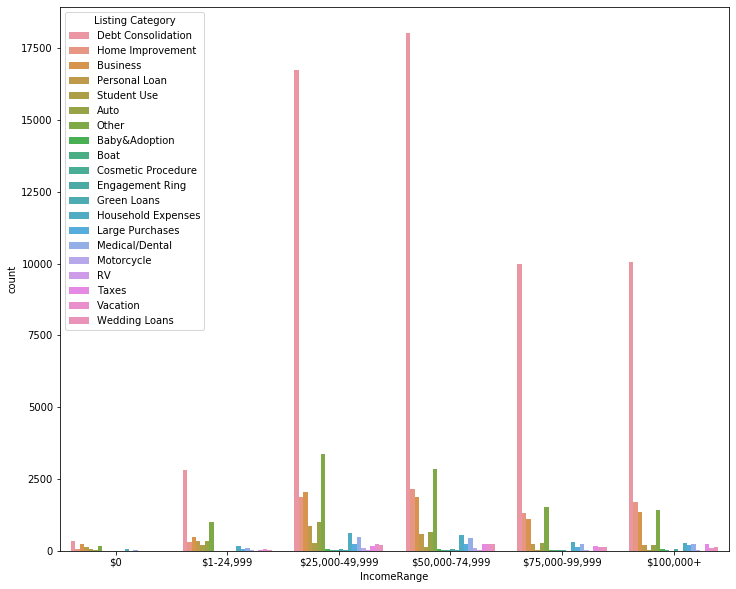

In [41]:
# Incomerange vs. Listing category
plt.figure(figsize = [12, 10])

sb.countplot(data = loan_copy, x = 'IncomeRange', hue = 'ListingCategory')
plt.legend(loc = 'upper left', title = 'Listing Category')
plt.show()

Since most of the loans are taken for debt consolidation and other purposes, we cannot draw a real relation between the income range and listing category.

What is the relation between the loan amount and borrower apr?

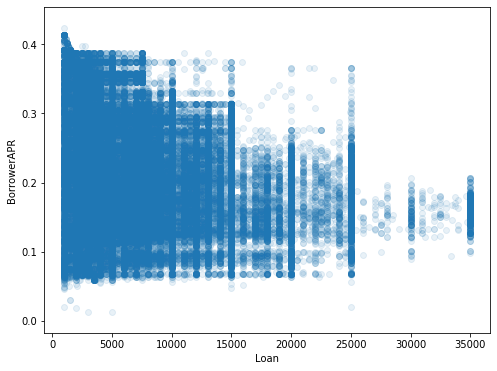

In [120]:
# scatter plot of LoanOriginalAmount vs. BorrowerAPR
plt.figure(figsize = [8, 6])
plt.scatter(data = loan_copy, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.xlabel('Loan amount')
plt.ylabel('BorrowerAPR')
plt.show()

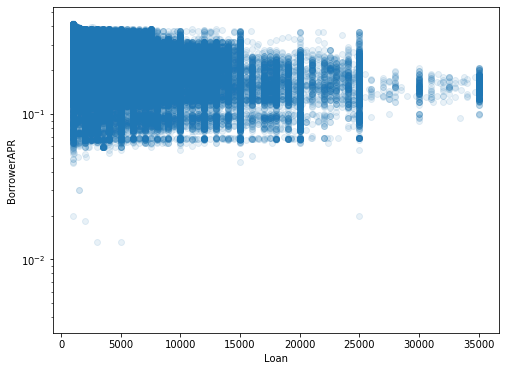

In [121]:
# scatter plot of LoanOriginalAmount vs. BorrowerAPR, with log transform on price axis
plt.figure(figsize = [8, 6])
plt.scatter(data = loan_copy, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.xlabel('Loan')
plt.yscale('log')
plt.ylabel('BorrowerAPR')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I made the following investigations:

- facet grid of Loan amount vs. IncomeRange
- different relations of numeric variables of 'LoanOriginalAmount', 'BorrowerAPR', 'EstimatedEffectiveYield' and categoric variables of 'ListingCategory', 'BorrowerState', 'Occupation', 'IncomeRange'
- 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

People in the income range 25k-75k take the highest number of loans.

There are some negative outliers of EstimatedEffectiveYield with relation to the 'LoanOriginalAmount', 'BorrowerAPR'. EstimatedEffectiveYield is the highest for smaller loan amounts and proportionately decreases for larger loan amounts. Apparently, the higher the BorrowerAPR is the higher the EstimatedEffectiveYield is.

Regarding loan categories vs loan amount, the debt consolidation and home improvement has some outliers which result in the highest loan amount. If we disregard these outliers, Business, Auto, Engagement ring and Medical/dental spendings stand out. Highest loan amount is in NJ. Professionals, teachers and IT people take the highest amount of loans.

Debt consolidation is a significant reason for loans in each income range categories.

Smaller loan amounts have higher BorrowerAPR. There are some BorrowerAPR diverging to 0. Its log transformation exhibited these more.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [55]:
!conda install -y -c anaconda seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Borcsi\Anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         165 KB  anaconda
    certifi-2020.4.5.1         |           py37_0         159 KB  anaconda
    conda-4.8.3                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1              |       he774522_0         5.7 MB  anaconda
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    ------------------------------------------------------------
                                           Total:         9.3 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2019.11.~ --> anaconda::ca-certificates-2020.1.1-0
  certifi            conda-forge::certifi-2019.11.28-py

How is borrower apr affected with income range with relation to loan amount?

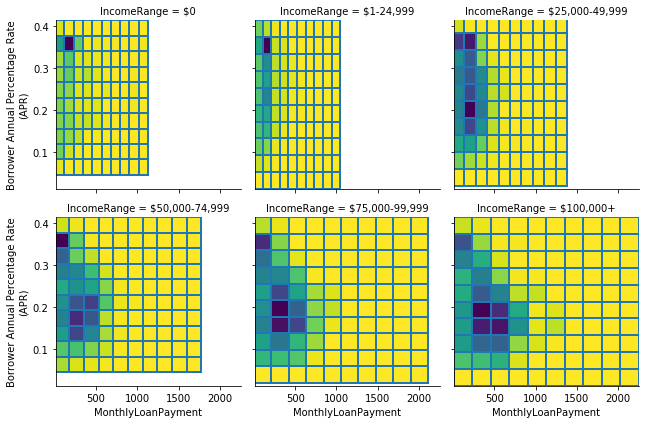

In [64]:
#heat map of IncomeRange vs. MonthlyLoanPayment vs. BorrowerAPR
g = sb.FacetGrid(data = loan_copy, col = 'IncomeRange', col_wrap = 3)
g.map(plt.hist2d, 'MonthlyLoanPayment', 'BorrowerAPR', cmap = 'viridis_r')
g.set_axis_labels(x_var='MonthlyLoanPayment', y_var='Borrower Annual Percentage Rate\n(APR)')

In [74]:
# select loan under monthly payment of 1500 USD
loan_flag = (loan_copy['MonthlyLoanPayment'] > 0) &(loan_copy['MonthlyLoanPayment'] <= 1500)
loan_1500 = loan_copy.loc[loan_flag,:]

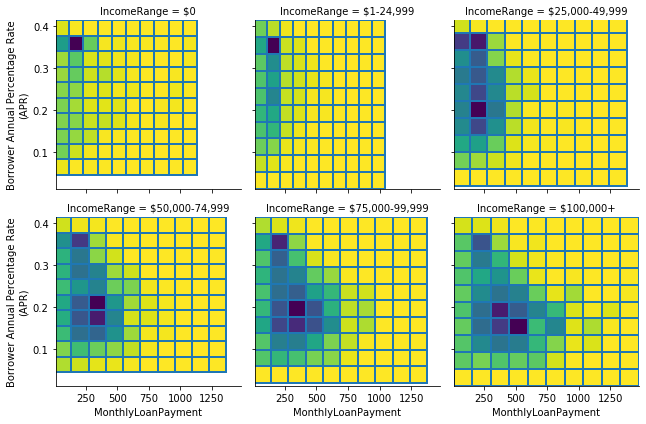

In [75]:
#heat map of IncomeRange vs. MonthlyLoanPayment vs. BorrowerAPR narrowed to 0-1,500 USD monthly payment range
g = sb.FacetGrid(data = loan_1500, col = 'IncomeRange', col_wrap = 3, size = 3,
                 xlim = [0, 1500])
g.map(plt.hist2d, 'MonthlyLoanPayment', 'BorrowerAPR', cmap = 'viridis_r')
g.set_xlabels('MonthlyLoanPayment')
g.set_ylabels('Borrower Annual Percentage Rate\n(APR)')

plt.show()

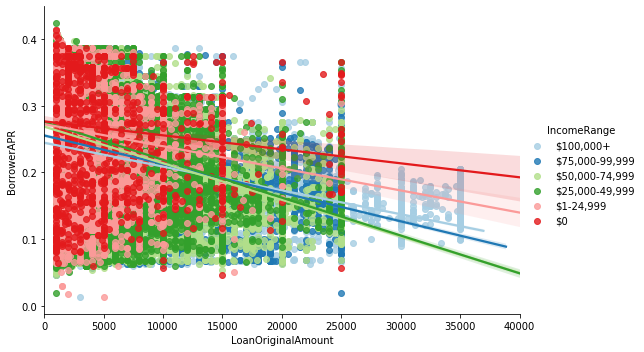

In [80]:
# multivariate plot of LoanOriginalAmount by BorrowerAPR, IncomeRange
income_labels = [ '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+' ] 
ax = sb.lmplot(data=loan_copy, x='LoanOriginalAmount', y='BorrowerAPR', hue='IncomeRange', hue_order=income_labels[::-1], palette="Paired", aspect=1.5)

ax.set(xlim=(0, 40000))

How is monthly loan payment affected by loan amount and listing category

<bound method Grid.set of <seaborn.axisgrid.FacetGrid object at 0x000000001FE82608>>

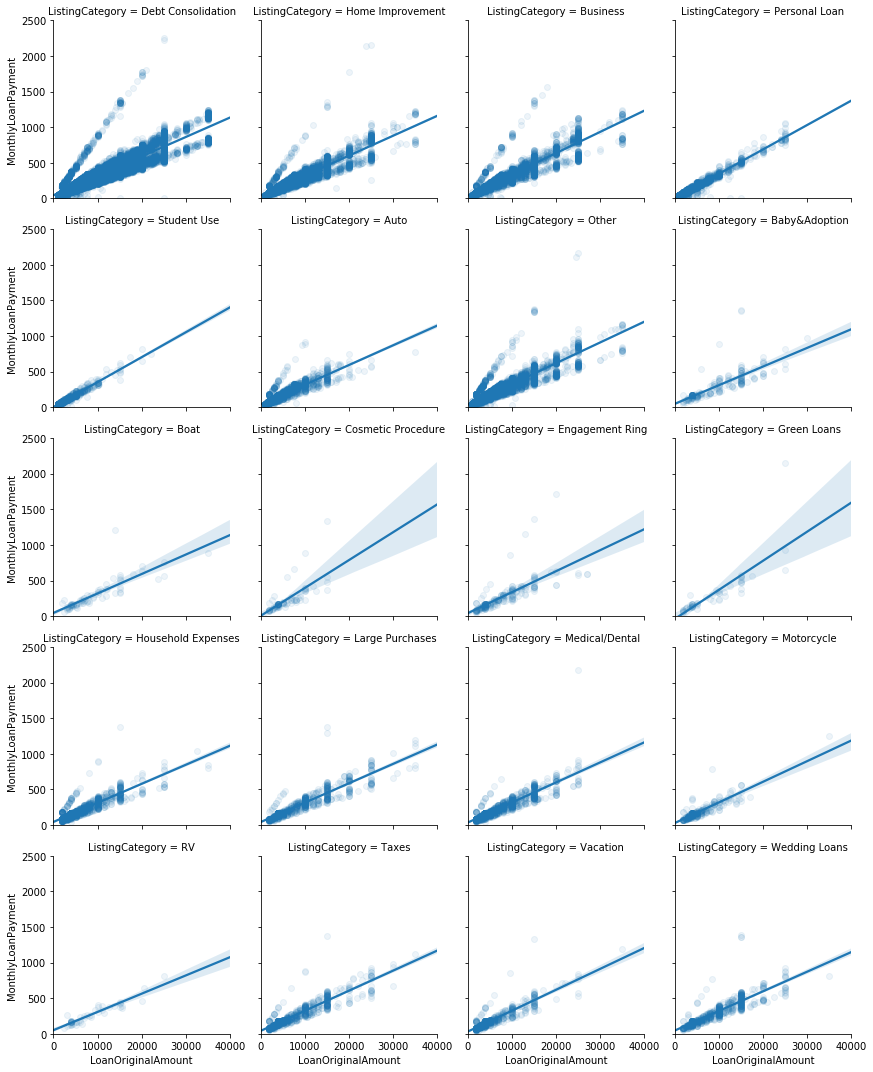

In [112]:
#multivariate plot of ListingCategory vs LoanOriginalAmount, MonthlyLoanPayment
g = sb.FacetGrid(loan_copy, col="ListingCategory", col_wrap=4, sharey=True, xlim=(0,40000), ylim=(0,2500)) # , hue="smoker")
g.fig.tight_layout()
plt.subplots_adjust(hspace=0.25) 

g.map(sb.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', scatter_kws={'alpha':0.075})
g.add_legend()
g.set

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I observed the following features:

- heat map of IncomeRange vs. MonthlyLoanPayment vs. BorrowerAPR, also narrowed to 0-1,500 USD monthly payment range
- scatterplot of LoanOriginalAmount by BorrowerAPR, IncomeRange
- faceted scatterplot of ListingCategory vs LoanOriginalAmount, MonthlyLoanPayment

### Were there any interesting or surprising interactions between features?

Checking the heat map of IncomeRange vs. MonthlyLoanPayment vs. BorrowerAPR, it became obvious that people with smaller income (under 50k) range and small monthly payment has the highest borrower APR value which is 0.35. People with larger income range (above 50k) will have almost the half of the borrower APR (around 0.2-0.25) for slightly bigger monthly payments.

Borrower APR flattens out for larger loan amount and larger income ranges. People with 0 USD income will have the highest borrowe APR. Only the highest income range takes loans larger than 25k.

There is a definite and regular trend of outliers of larger monthly payments for smaller loan amounts in almost each listing category. The most popular listing categories like debt consolidation, home improvement have a wide range of monthly payments. The financing of the less popular categories does not divert that much. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!